<Axes: xlabel='X0', ylabel='X1'>

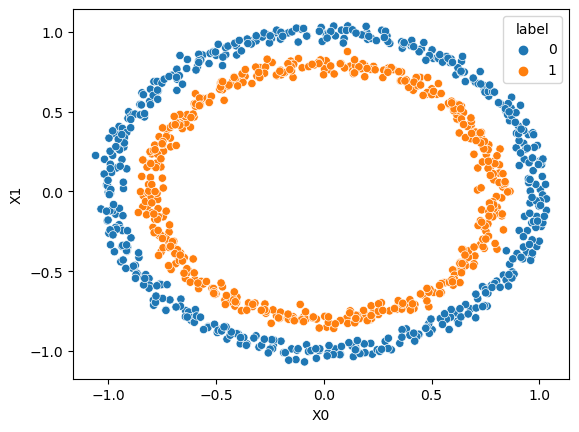

In [1]:
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
n_samples = 1000
X,y = make_circles(n_samples,
noise = 0.03,
random_state=42)
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
sns.scatterplot(data=circles,x="X0",y="X1",hue="label")


In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)
model = tf.keras.Sequential([
tf.keras.layers.Dense(16,activation='relu',input_shape=(2,)),
tf.keras.layers.Dense(8,activation='relu'),
tf.keras.layers.Dense(1,activation='sigmoid')
])


In [3]:
model.compile(
loss='binary_crossentropy',
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
history=model.fit(X_train,y_train,epochs=10)

Epoch 1/10
22/22 [==============================] - 1s 2ms/step - loss: 0.6895 - accuracy: 0.5386
Epoch 2/10
22/22 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.5586
Epoch 3/10
22/22 [==============================] - 0s 765us/step - loss: 0.6525 - accuracy: 0.7571
Epoch 4/10
22/22 [==============================] - 0s 936us/step - loss: 0.6213 - accuracy: 0.7029
Epoch 5/10
22/22 [==============================] - 0s 927us/step - loss: 0.5493 - accuracy: 0.8800
Epoch 6/10
22/22 [==============================] - 0s 992us/step - loss: 0.4414 - accuracy: 0.9429
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2997 - accuracy: 0.9886
Epoch 8/10
22/22 [==============================] - 0s 1ms/step - loss: 0.1908 - accuracy: 0.9886
Epoch 9/10
22/22 [==============================] - 0s 1ms/step - loss: 0.1175 - accuracy: 0.9971
Epoch 10/10
22/22 [==============================] - 0s 1ms/step - loss: 0.0775 - accuracy: 0.9957


In [5]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.0803 - accuracy: 1.0000


[0.08033864200115204, 1.0]

Text(0, 0.5, 'Loss Value')

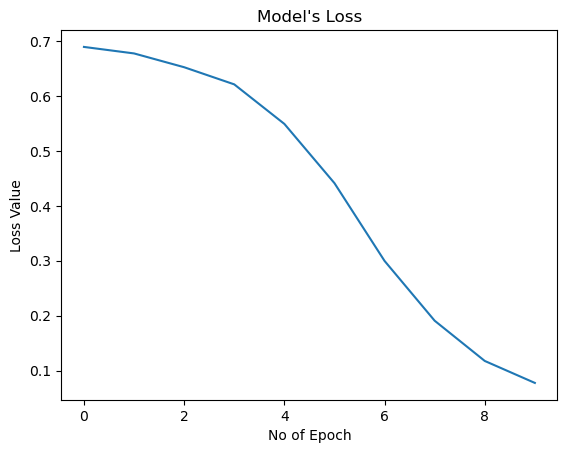

In [6]:
plt.title("Model's Loss")
plt.plot(history.history['loss'])
plt.xlabel("No of Epoch")
plt.ylabel("Loss Value")

In [7]:
def plotq(model,X,y):
    x_min,x_max = X[:,0].min()- 0.1,X[:,0].max() + 0.1
    y_min , y_max = X[:,1].min()-0.1 ,X[:,1].max()+0.1
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
    np.linspace(y_min,y_max,100))
    x_in = np.c_[xx.ravel(),yy.ravel()]
    y_pred = model.predict(x_in)
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print("doing binary")
    y_pred = np.round(y_pred).reshape(xx.shape)
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
   
    


313/313 [==============================] - 0s 810us/step
doing binary
313/313 [==============================] - 0s 822us/step
doing binary


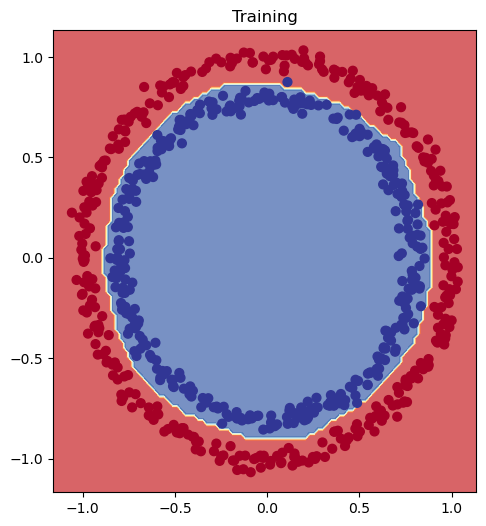

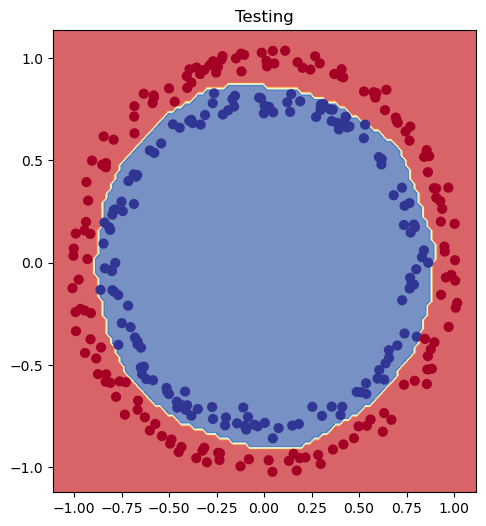

<Figure size 1200x600 with 0 Axes>

In [14]:
 plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Training')
plotq(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Testing')
plotq(model,X_test,y_test)


# SVM

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [16]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

In [17]:
svm_classifier = SVC(kernel='linear', C=1)
# Linear kernel with regularization parameter C=1
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



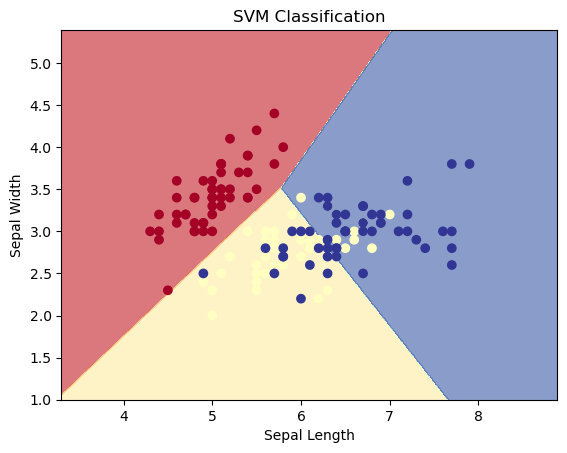

In [19]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max,0.01))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Classification')
plt.show()